In [33]:
import ast

import pandas as pd

from bootcamp.config import Config

df = pd.read_parquet(Config.Path.DATA_DIR / "crypto-news.parquet")

sentiment_df = pd.DataFrame(list(df["sentiment"].apply(ast.literal_eval).values))

df = pd.concat([df.drop("sentiment", axis=1), sentiment_df], axis=1)
df.shape

(31037, 9)

In [29]:
df.head()

,date,source,subject,text,title,url,class,polarity,subjectivity
0,2023-12-19 06:40:41,CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,negative,-0.10,0.60
1,2023-12-19 06:03:24,CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,neutral,0.00,0.00
2,2023-12-19 05:55:14,CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,positive,0.05,0.05
3,2023-12-19 05:35:26,CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,positive,0.50,0.90
4,2023-12-19 05:31:08,CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,neutral,0.00,0.00


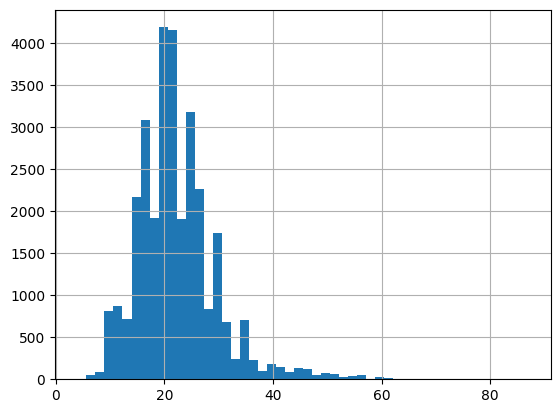

In [30]:
df.text.str.split().apply(len).hist(bins=50);

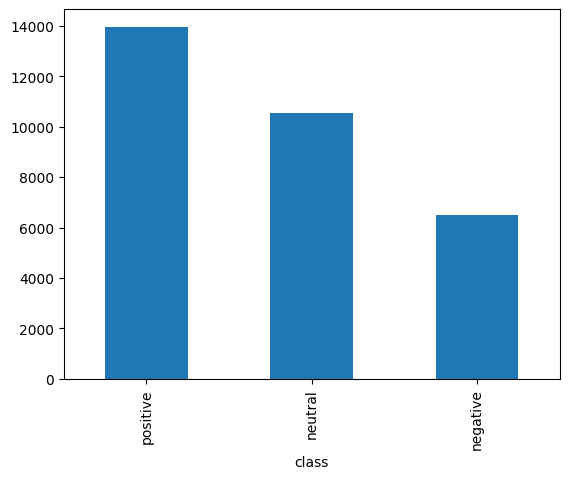

In [32]:
df["class"].value_counts().plot(kind="bar");

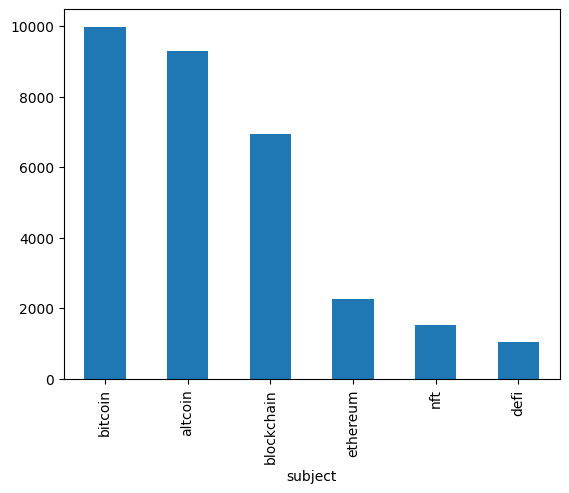

In [31]:
df.subject.value_counts().plot(kind="bar");

## Emails


In [37]:
df = pd.read_parquet(Config.Path.DATA_DIR / "email-summaries.parquet")
df.head()

,conversation_id,email,maximum_brevity_summary,summary,model_name,distilabel_metadata.raw_input_email_summarization_0,distilabel_metadata.raw_output_email_summarization_0
index,,,,,,,
93990,358,Subject: Following up from the interfaith even...,Samantha is following up from the interfaith e...,Samantha met at the interfaith event and enjoy...,Qwen/Qwen2.5-72B-Instruct,None,## Maximum brevity summary\n\nSamantha is foll...
45571,241,Subject: RE: Checking in and seeking your valu...,Jenna is excited to collaborate on a workshop ...,Jenna thanks Marcus for sharing an article and...,Qwen/Qwen2.5-72B-Instruct,None,## Maximum brevity summary\n\nJenna is excited...
46400,491,Subject: Interesting developments in the natur...,John is reaching out to discuss the impact of ...,John is reaching out to discuss the recent dis...,Qwen/Qwen2.5-72B-Instruct,None,## Maximum brevity summary\n\nJohn is reaching...
49664,512,Subject: Seeking your expertise on a new e-lea...,Emily is seeking input on an e-learning course...,Emily is reaching out for input and expertise ...,Qwen/Qwen2.5-72B-Instruct,None,## Maximum brevity summary\n\nEmily is seeking...
96963,277,Subject: Reconnecting and collaboration idea\n...,Sarah proposes collaborating on educational re...,Sarah expresses interest in collaborating on a...,Qwen/Qwen2.5-72B-Instruct,None,## Maximum brevity summary\n\nSarah proposes c...


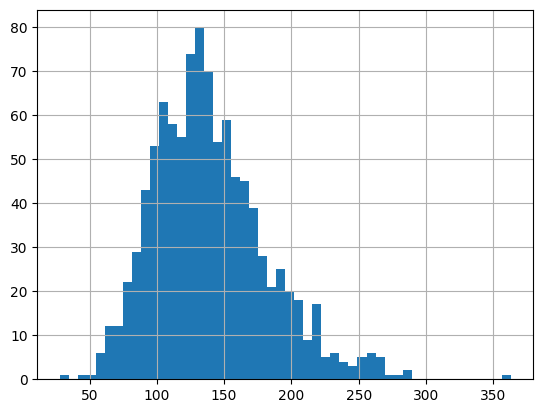

In [38]:
df.email.str.split().apply(len).hist(bins=50);